In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.np.random.seed(5)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/bananas.csv')

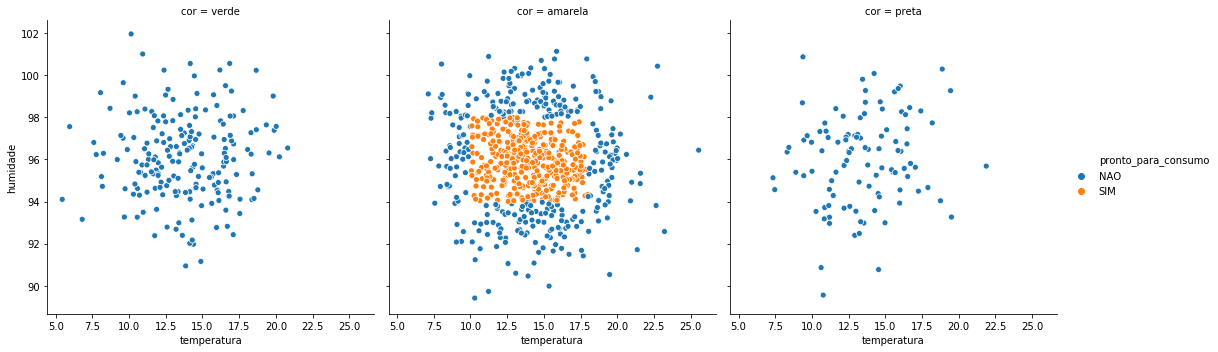

In [3]:
#Comportamento

sns.relplot(x='temperatura', y='humidade',col='cor', hue='pronto_para_consumo', data=df)

In [4]:
#Manipulação

swap = {
    'SIM': 1,
    'NAO': 0
}
df['pronto_para_consumo'] = df['pronto_para_consumo'].map(swap)

In [5]:
tipos = df['cor'].str.get_dummies()
df = pd.concat([df, tipos], axis=1)
df.drop(['cor'], axis = 1)
df = df[['temperatura', 'humidade', 'amarela', 'preta', 'verde', 'pronto_para_consumo']]

In [6]:
#Estratificaçâo

x = df[['temperatura','humidade', 'amarela', 'preta', 'verde']]
y = df['pronto_para_consumo']

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

data_input = scaler.transform(x)

In [7]:
#Base_line

dummy_stratified = DummyClassifier(random_state=20)
dummy_stratified.fit(treino_x,treino_y)
dummy_stratified.score(teste_x,teste_y) * 100

print(f"Base_Line: {dummy_stratified.score(teste_x,teste_y) * 100}%")

Base_Line: 48.0%


In [8]:
#LinearSVC

model_LinearSVC = LinearSVC(random_state=20)
model_LinearSVC.fit(treino_x, treino_y)
previsoes_LinearSVC = model_LinearSVC.predict(teste_x)
print(f"LinearSVC_Model: {accuracy_score(teste_y, previsoes_LinearSVC)*100}%")

previsoes_LinearSVC = pd.DataFrame(model_LinearSVC.predict(data_input), columns=['previsoes'])
print(f"Accuracy Linear_SVC: {accuracy_score(y, previsoes_LinearSVC)*100}%")

LinearSVC_Model: 73.2%
Accuracy Linear_SVC: 74.8%


In [9]:
#SVC

model_SVC = SVC(random_state=20)
model_SVC.fit(treino_x, treino_y)
previsoes_SVC = model_SVC.predict(teste_x)
print(f"SVC_Model: {accuracy_score(teste_y, previsoes_SVC)*100}%")

previsoes_SVC = pd.DataFrame(model_SVC.predict(data_input), columns=['previsoes'])
print(f"Accuracy SVC: {accuracy_score(y, previsoes_SVC)*100}%")

SVC_Model: 94.39999999999999%
Accuracy SVC: 95.6%


In [10]:
#DecisionTree

model_DecisionTree = DecisionTreeClassifier(random_state=20)
model_DecisionTree.fit(treino_x,treino_y)
previsoes_DecisionTree = model_DecisionTree.predict(teste_x)
print(f"DecisionTree_Model: {accuracy_score(teste_y,previsoes_DecisionTree) * 100}%")

previsoes_DecisionTree = pd.DataFrame(model_DecisionTree.predict(data_input), columns=['previsoes'])
print(f"Accuracy DecisionTree: {accuracy_score(y, previsoes_DecisionTree)*100}%")

DecisionTree_Model: 99.2%
Accuracy DecisionTree: 99.8%


In [11]:
#Concatenação

df_LinearSVC = pd.concat([df, previsoes_LinearSVC], axis=1)
df_SVC = pd.concat([df, previsoes_SVC], axis=1)
df_DecisionTree = pd.concat([df, previsoes_DecisionTree], axis=1)

In [12]:
#Função_Comparadora

def Score(row):
    if row['pronto_para_consumo'] == row['previsoes']:
        return True
    else:
        return False

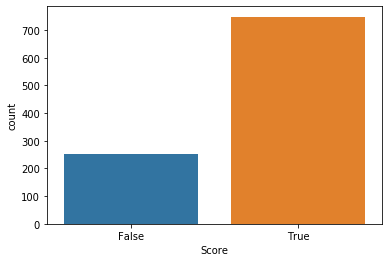

In [13]:
#Resultados_LinearSVC

df_LinearSVC['Score'] = df_LinearSVC.apply(Score, axis=1)
sns.countplot(x='Score', data=df_LinearSVC)

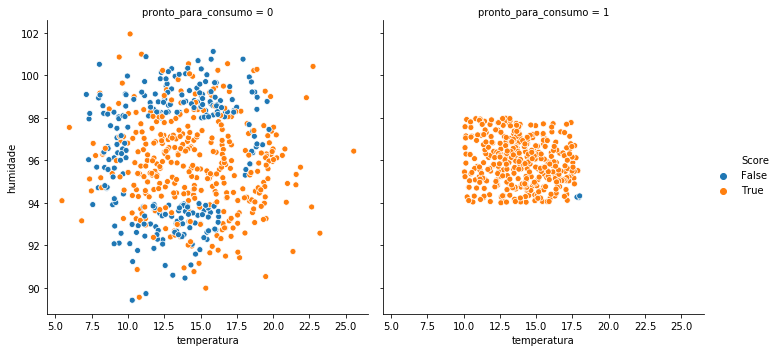

In [14]:
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='Score', data=df_LinearSVC)

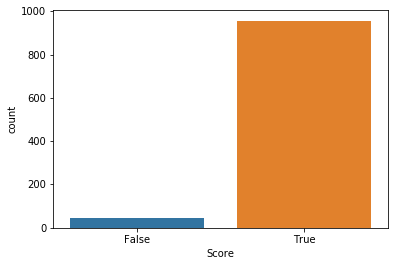

In [15]:
#Resultados_SVC

df_SVC ['Score'] = df_SVC.apply(Score, axis=1)
sns.countplot(x='Score', data=df_SVC)

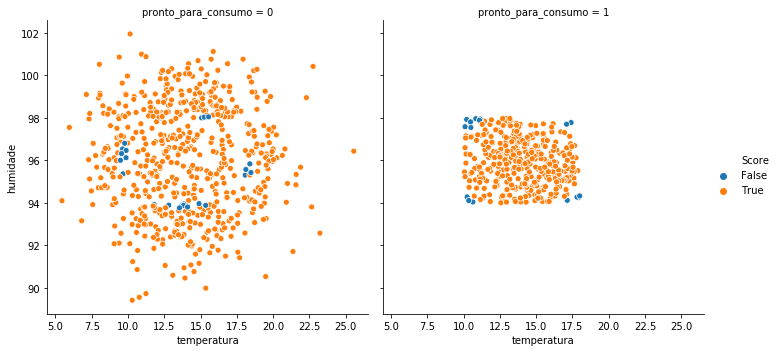

In [16]:
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='Score', data=df_SVC)

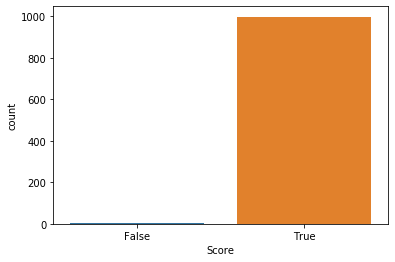

In [17]:
#Resultados_DecisionTree

df_DecisionTree['Score'] = df_DecisionTree.apply(Score, axis=1)
sns.countplot(x='Score', data=df_DecisionTree)

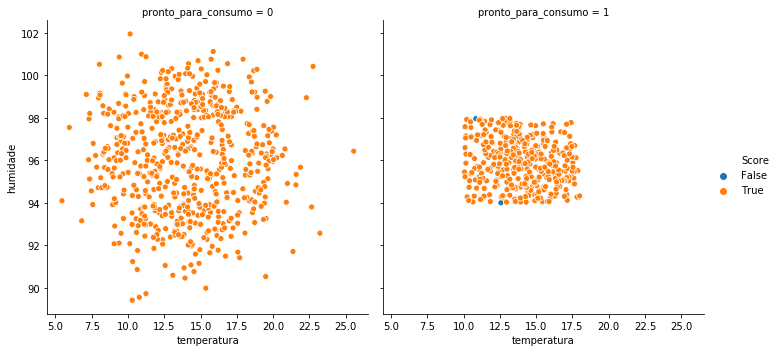

In [18]:
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='Score', data=df_DecisionTree)

[Text(465.0, 830.5, 'amarela <= -0.45\ngini = 0.476\nsamples = 750\nvalue = [457, 293]\nclass = no'),
 Text(310.0, 679.5, 'gini = 0.0\nsamples = 221\nvalue = [221, 0]\nclass = no'),
 Text(620.0, 679.5, 'humidade <= -0.936\ngini = 0.494\nsamples = 529\nvalue = [236, 293]\nclass = yes'),
 Text(465.0, 528.5, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]\nclass = no'),
 Text(775.0, 528.5, 'humidade <= 1.006\ngini = 0.436\nsamples = 432\nvalue = [139, 293]\nclass = yes'),
 Text(465.0, 377.5, 'temperatura <= 1.359\ngini = 0.27\nsamples = 348\nvalue = [56, 292]\nclass = yes'),
 Text(310.0, 226.5, 'temperatura <= -1.375\ngini = 0.14\nsamples = 316\nvalue = [24, 292]\nclass = yes'),
 Text(155.0, 75.5, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]\nclass = no'),
 Text(465.0, 75.5, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]\nclass = yes'),
 Text(620.0, 226.5, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = no'),
 Text(1085.0, 377.5, 'humidade <= 1.029\ngini = 0.024\nsamples = 84\nvalue = [83, 1]\

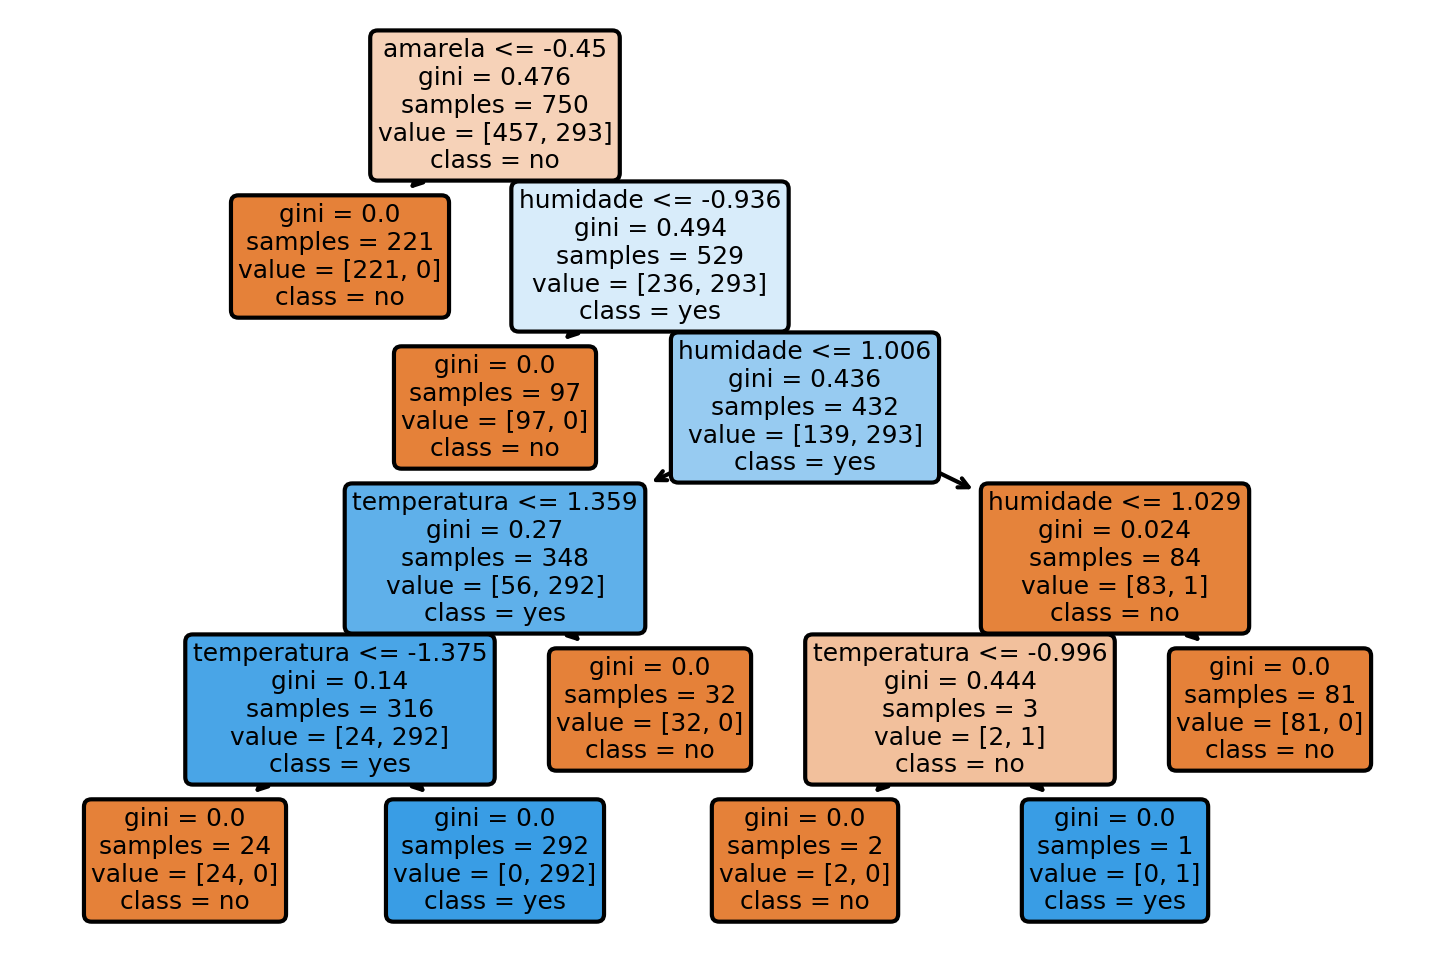

In [19]:
features = x.columns

plt.figure(dpi=300)
plot_tree(model_DecisionTree, filled=True, feature_names=features, rounded=True, class_names= ['no', 'yes'])